## siRNA knockdown ##

This notebook fits analytical functions to Rafał’s data.

The analytical functions look like this:

$$f_\text{red}(t) =
m_\text{r}\,k_\text{tl} \left(
\frac{1}{\beta_\text{r}-\delta_\text{r}+k_\text{m,r}} \mathrm{e}^{-(\beta_\text{r}+k_\text{m,r})(t-t_0)}
-\frac{1}{\beta_\text{r} - \delta_\text{r}} \mathrm{e}^{-\beta_\text{r} (t-t_0)}
+\frac{k_\text{m,r}}{(\beta_\text{r}-\delta_\text{r}) (\beta_\text{r}-\delta_\text{r}+k_\text{m,r})} \mathrm{e}^{-\delta_\text{r} (t-t_0)}
\right)
$$

$$f_\text{green}(t) =
m_\text{g}\,k_\text{tl} \left(
\frac{1}{\beta_\text{g}-\delta_\text{g}+k_\text{m,g}} \mathrm{e}^{-(\beta_\text{g}+k_\text{m,g})(t-t_0)}
-\frac{1}{\beta_\text{g} - \delta_\text{g}} \mathrm{e}^{-\beta_\text{g} (t-t_0)}
+\frac{k_\text{m,g}}{(\beta_\text{g}-\delta_\text{g}) (\beta_\text{g}-\delta_\text{g}+k_\text{m,g})} \mathrm{e}^{-\delta_\text{g} (t-t_0)}
\right)
$$

In [1]:
# Import modules needed
%matplotlib inline
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [8]:
def red(t, t0, ktl, mr, kmr, betr, deltr):
    """Model function for red data"""

    idx_after = (t > t0)
    f = np.zeros(np.shape(t))
    dt = t[idx_after] - t0

    f1 = np.exp(- (betr + kmr) * dt) / (betr - deltr + kmr)
    f2 = - np.exp(- betr * dt) / (betr - deltr)
    f3 = kmr * np.exp(- deltr * dt) / (betr - deltr) / (betr - deltr + kmr)

    f[idx_after] = f0
    f0 = (f1 + f2 + f3) * mr * ktl


    return f

In [3]:
def green(t, ktl, mg, kmg, betg, deltg):
    """Model function for green data"""

    f1 = np.exp(- (betg + kmg) * t) / (betg - deltg + kmg)
    f2 = - np.exp(- betg * t) / (betg - deltg)
    f3 = kmg * np.exp(- deltg * t) / (betg - deltg) / (betg - deltg + kmg)

    f = f1 + f2 + f3
    f *= mg * ktl

    return f

In [4]:
t = np.linspace(0, 50)
t0 = 2
ktl = 5

mr = 19
kmr = 0.03
betr = 0.16
deltr = 0.07

mg = 2
kmg = 4
betg = 0.03
deltg = 0.07

R = red(t, t0, ktl, mr, kmr, betr, deltr)
G = green(t, ktl, mg, kmg, betg, deltg)

In [9]:
R0 = red(np.asarray(t0), t0, ktl, mr, kmr, betr, deltr)

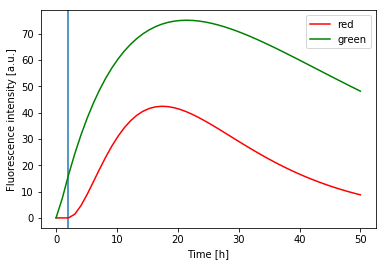

In [10]:
fig = plt.figure()
plt.axvline(t0)
plt.plot(t, R, 'r-', label='red')
plt.plot(t, G, 'g-', label='green')
plt.xlabel('Time [h]')
plt.ylabel('Fluorescence intensity [a.u.]')
plt.legend()
plt.show()
plt.close()

From the [documentation](http://lmfit-py.readthedocs.io/en/latest/model.html#lmfit.model.Model.fit):

If supplied, `weights` will be used to weight the calculated residual so that the quantity minimized in the least-squares sense is `weights*(data - fit)`. `weights` must be an `ndarray`-like object of same size and shape as `data`.

In [11]:
print(R)
print(R0)
print(t)

[  0.00000000e+00   0.00000000e+00   2.36048502e-03   1.38377410e+00
   4.62033346e+00   8.90994179e+00   1.36744002e+01   1.85067594e+01
   2.31299884e+01   2.73646566e+01   3.11037746e+01   3.42933109e+01
   3.69171931e+01   3.89858414e+01   4.05274779e+01   4.15816037e+01
   4.21941658e+01   4.24140312e+01   4.22904682e+01   4.18713975e+01
   4.12022257e+01   4.03251172e+01   3.92785896e+01   3.80973451e+01
   3.68122713e+01   3.54505574e+01   3.40358887e+01   3.25886891e+01
   3.11263898e+01   2.96637080e+01   2.82129257e+01   2.67841581e+01
   2.53856099e+01   2.40238128e+01   2.27038446e+01   2.14295292e+01
   2.02036161e+01   1.90279416e+01   1.79035715e+01   1.68309277e+01
   1.58098986e+01   1.48399357e+01   1.39201373e+01   1.30493209e+01
   1.22260849e+01   1.14488620e+01   1.07159633e+01   1.00256169e+01
   9.37599893e+00   8.76526034e+00]
0.0
[  0.           1.02040816   2.04081633   3.06122449   4.08163265
   5.10204082   6.12244898   7.14285714   8.16326531   9.18367347
